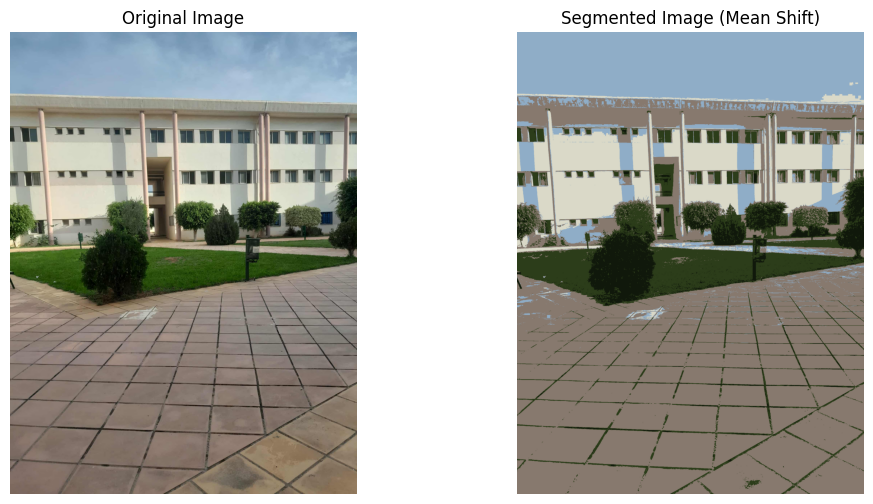

Estimated bandwidth: 0.576
Total clusters found: 5


In [ ]:
# Mean Shift Image Segmentation based on color and intensity

import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.preprocessing import StandardScaler

# =============================
# 1. Load and preprocess image
# =============================

# Load image (you can replace with your own path)
image = cv2.imread("111.jpeg")
image = cv2.imread("222.jpeg")
image = cv2.imread("333.jpeg")



# Convert from BGR (OpenCV default) to RGB for display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Get image dimensions
rows, cols, channels = image_rgb.shape

# =============================
# 2. Reshape image for clustering
# =============================
# Flatten the image pixels into a 2D array (each row = one pixel)
# Each pixel is represented by [R, G, B]
flat_image = np.reshape(image_rgb, [-1, 3])

# Normalize color values for stability
scaler = StandardScaler()
flat_image_scaled = scaler.fit_transform(flat_image)

# =============================
# 3. Estimate bandwidth & fit Mean Shift
# =============================

# Estimate bandwidth (controls cluster size)
bandwidth = estimate_bandwidth(flat_image_scaled, quantile=0.1, n_samples=500)

# Apply Mean Shift clustering
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(flat_image_scaled)

# Get cluster labels
labels = ms.labels_

# Get cluster centers (mean color of each region)
cluster_centers = scaler.inverse_transform(ms.cluster_centers_)

# =============================
# 4. Recreate segmented image
# =============================

# Map each pixel to its cluster's center color
segmented_image = cluster_centers[labels].reshape(rows, cols, 3).astype(np.uint8)

# =============================
# 5. Display results
# =============================
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title("Segmented Image (Mean Shift)")
plt.axis("off")

plt.show()

print(f"Estimated bandwidth: {bandwidth:.3f}")
print(f"Total clusters found: {len(np.unique(labels))}")
